In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    make_scorer
)

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import confusion_matrix

from google.colab import drive
import warnings
warnings.filterwarnings("ignore")

In [2]:
drive.mount('/content/drive')
folder_path = '/content/drive/MyDrive/DS/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#These are our Target Antibitoics
antibiotics = ['Gentamicin', 'Trimethoprim_Sulfamethoxazole', 'Ciprofloxacin',
                'Ampicillin', 'Cefazolin','Nitrofurantoin','Piperacillin_Tazobactam',
                'Levofloxacin', 'Ceftriaxone']

In [4]:
def false_negative_rate(y_true, y_pred):
    fnr = 1 - recall_score(y_true, y_pred)
    return fnr

fnr_scorer = make_scorer(false_negative_rate, greater_is_better=False)
precision_scorer = make_scorer(precision_score, zero_division=0)

scoring = {
    'accuracy': 'accuracy',
    'f1': 'f1',
    'roc_auc': 'roc_auc',
    'precision': 'precision',
    'recall': 'recall',
    'fnr': fnr_scorer
}

In [5]:
n_randstat = 312
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=n_randstat)

In [6]:
acc_scores = []
fnr_scores = []

for at in antibiotics:
  df = pd.read_csv(f'{folder_path}/{at}_train_data.csv')
  print(f'\n=== {at} ===')
  print('Shape:', df.shape)

  X = df.drop(columns=[at])
  y = (df[at] - 1).astype(int)

  knn = Pipeline([
        ('scaler', StandardScaler()),
        ('clf', KNeighborsClassifier(n_neighbors=3))
  ])
  results = cross_validate(knn, X, y, cv=kf, scoring=scoring)

  for metric in scoring.keys():
      mean_score = np.mean(results['test_' + metric])
      print(f'{metric}: {mean_score:.3f}')

  acc_scores.append(np.mean(results['test_accuracy']))
  fnr_scores.append(np.mean(results['test_fnr']))


=== Gentamicin ===
Shape: (6475, 14)
accuracy: 0.911
f1: 0.024
roc_auc: 0.510
precision: 0.076
recall: 0.014
fnr: -0.986

=== Trimethoprim_Sulfamethoxazole ===
Shape: (6475, 14)
accuracy: 0.696
f1: 0.153
roc_auc: 0.491
precision: 0.212
recall: 0.120
fnr: -0.880

=== Ciprofloxacin ===
Shape: (6475, 14)
accuracy: 0.800
f1: 0.160
roc_auc: 0.555
precision: 0.238
recall: 0.120
fnr: -0.880

=== Ampicillin ===
Shape: (6475, 14)
accuracy: 0.530
f1: 0.376
roc_auc: 0.501
precision: 0.400
recall: 0.354
fnr: -0.646

=== Cefazolin ===
Shape: (6475, 14)
accuracy: 0.884
f1: 0.076
roc_auc: 0.535
precision: 0.155
recall: 0.051
fnr: -0.949

=== Nitrofurantoin ===
Shape: (6475, 14)
accuracy: 0.985
f1: 0.000
roc_auc: 0.492
precision: 0.000
recall: 0.000
fnr: -1.000

=== Piperacillin_Tazobactam ===
Shape: (6475, 14)
accuracy: 0.985
f1: 0.000
roc_auc: 0.490
precision: 0.000
recall: 0.000
fnr: -1.000

=== Levofloxacin ===
Shape: (6475, 14)
accuracy: 0.808
f1: 0.173
roc_auc: 0.551
precision: 0.271
recall: 0.

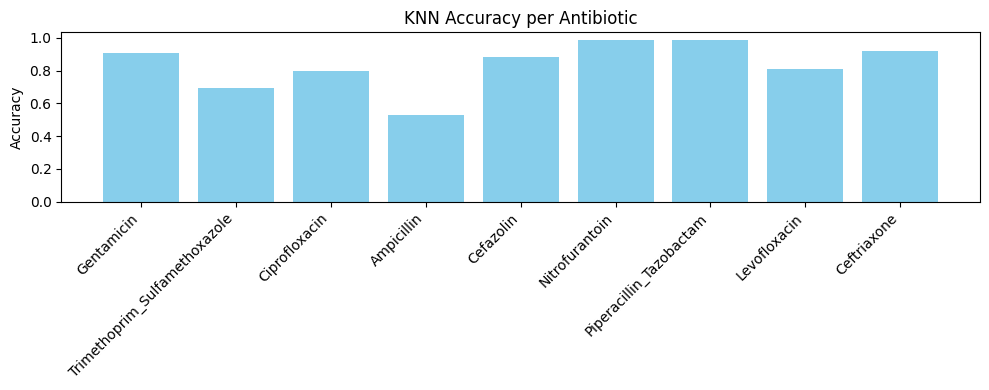

In [7]:
plt.figure(figsize=(10,4))
plt.bar(antibiotics, acc_scores, color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy per Antibiotic')
plt.tight_layout()
plt.show()

#Now im trying 5 neighbors

In [8]:
acc_scores = []
fnr_scores = []

for at in antibiotics:
  df = pd.read_csv(f'{folder_path}/{at}_train_data.csv')
  print(f'\n=== {at} ===')
  print('Shape:', df.shape)

  X = df.drop(columns=[at])
  y = (df[at] - 1).astype(int)

  knn = Pipeline([
        ('scaler', StandardScaler()),
        ('clf', KNeighborsClassifier(n_neighbors=5))
  ])
  results = cross_validate(knn, X, y, cv=kf, scoring=scoring)

  for metric in scoring.keys():
      mean_score = np.mean(results['test_' + metric])
      print(f'{metric}: {mean_score:.3f}')

  acc_scores.append(np.mean(results['test_accuracy']))
  fnr_scores.append(np.mean(results['test_fnr']))


=== Gentamicin ===
Shape: (6475, 14)
accuracy: 0.920
f1: 0.000
roc_auc: 0.514
precision: 0.000
recall: 0.000
fnr: -1.000

=== Trimethoprim_Sulfamethoxazole ===
Shape: (6475, 14)
accuracy: 0.722
f1: 0.098
roc_auc: 0.494
precision: 0.193
recall: 0.066
fnr: -0.934

=== Ciprofloxacin ===
Shape: (6475, 14)
accuracy: 0.822
f1: 0.119
roc_auc: 0.576
precision: 0.272
recall: 0.076
fnr: -0.924

=== Ampicillin ===
Shape: (6475, 14)
accuracy: 0.537
f1: 0.352
roc_auc: 0.506
precision: 0.399
recall: 0.315
fnr: -0.685

=== Cefazolin ===
Shape: (6475, 14)
accuracy: 0.899
f1: 0.029
roc_auc: 0.544
precision: 0.144
recall: 0.016
fnr: -0.984

=== Nitrofurantoin ===
Shape: (6475, 14)
accuracy: 0.987
f1: 0.000
roc_auc: 0.491
precision: 0.000
recall: 0.000
fnr: -1.000

=== Piperacillin_Tazobactam ===
Shape: (6475, 14)
accuracy: 0.986
f1: 0.000
roc_auc: 0.482
precision: 0.000
recall: 0.000
fnr: -1.000

=== Levofloxacin ===
Shape: (6475, 14)
accuracy: 0.824
f1: 0.112
roc_auc: 0.559
precision: 0.275
recall: 0.